<a href="https://colab.research.google.com/github/Narissarach/Project_eye/blob/main/noise2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Import Modules

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.datasets import mnist

### Load the Dataset

In [2]:
(x_train, _), (x_test, _) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
# normalize the image data
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

In [4]:
# reshape in the input data for the model
x_train = x_train.reshape(len(x_train), 28, 28, 1)
x_test = x_test.reshape(len(x_test), 28, 28, 1)
x_test.shape

(10000, 28, 28, 1)

### Add Noise to the Image

In [7]:
# add noise
noise_factor = 0.6
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

In [11]:
# clip the values in the range of 0-1
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

### Exploratory Data Analysis

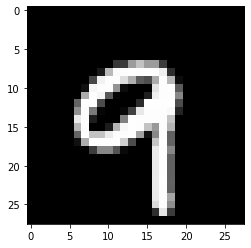

In [14]:
# randomly select input image
index = np.random.randint(len(x_test))
# plot the image
plt.imshow(x_test[index].reshape(28,28))
plt.gray()

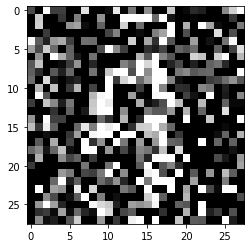

In [16]:
# randomly select input image
index = np.random.randint(len(x_test))
# plot the image
plt.imshow(x_test_noisy[index].reshape(28,28))
plt.gray()

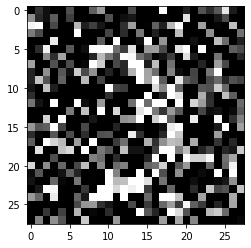

In [17]:
# randomly select input image
index = np.random.randint(len(x_test))
# plot the image
plt.imshow(x_test_noisy[index].reshape(28,28))
plt.gray()

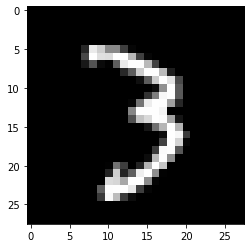

In [18]:
plt.imshow(x_test[index].reshape(28,28))
plt.gray()

### Model

In [19]:
model = Sequential([
    # encoder network
    Conv2D(32, 3, activation='relu', padding='same', input_shape=(28, 28, 1)),
    MaxPooling2D(2, padding='same'),
    Conv2D(64, 3, activation='relu', padding='same'),
    MaxPooling2D(2, padding='same'),
    # decoder network
    Conv2D(16, 3, activation='relu', padding='same'),
    UpSampling2D(2),
    Conv2D(32, 3, activation='relu', padding='same'),
    UpSampling2D(2),
    # output layer
    Conv2D(1, 3, activation='sigmoid', padding='same')
])

model.compile(optimizer='adam', loss='binary_crossentropy')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 16)          9232      
                                                                 
 up_sampling2d (UpSampling2D  (None, 14, 14, 16)       0

In [21]:
# train the model
model.fit(x_train_noisy, x_train, epochs=20, batch_size=256, validation_data=(x_test_noisy, x_test))

Epoch 1/20
235/235 [==============================] - 180s 765ms/step - loss: 0.1827 - val_loss: 0.1412
Epoch 2/20
235/235 [==============================] - 167s 710ms/step - loss: 0.1365 - val_loss: 0.1309
Epoch 3/20
235/235 [==============================] - 165s 703ms/step - loss: 0.1298 - val_loss: 0.1267
Epoch 4/20
235/235 [==============================] - 169s 720ms/step - loss: 0.1261 - val_loss: 0.1236
Epoch 5/20
235/235 [==============================] - 166s 705ms/step - loss: 0.1236 - val_loss: 0.1219
Epoch 6/20
235/235 [==============================] - 165s 703ms/step - loss: 0.1219 - val_loss: 0.1201
Epoch 7/20
235/235 [==============================] - 166s 705ms/step - loss: 0.1204 - val_loss: 0.1193
Epoch 8/20
235/235 [==============================] - 164s 697ms/step - loss: 0.1190 - val_loss: 0.1181
Epoch 9/20
235/235 [==============================] - 165s 703ms/step - loss: 0.1179 - val_loss: 0.1169
Epoch 10/20
235/235 [==============================] - 168s 716m

### Visualize the Results

In [22]:
# predict the results from model (get compressed image)
pred = model.predict(x_test)

313/313 [==============================] - 8s 24ms/step


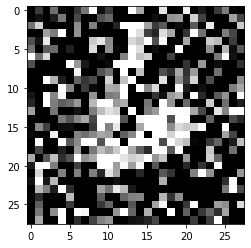

In [24]:
# randomly select input image
index = np.random.randint(len(x_test))
# plot the image
plt.imshow(x_test_noisy[index].reshape(28,28))
plt.gray()

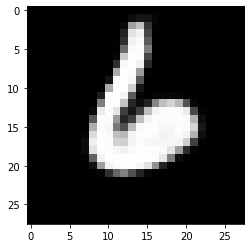

In [25]:
# visualize compressed image
plt.imshow(pred[index].reshape(28,28))
plt.gray()

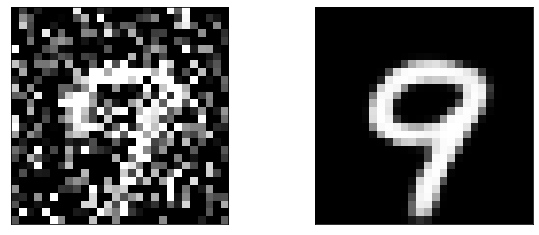

In [29]:
index = np.random.randint(len(x_test))
plt.figure(figsize=(10, 4))
# display original image
ax = plt.subplot(1, 2, 1)
plt.imshow(x_test_noisy[index].reshape(28,28))
plt.gray()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
# display compressed image
ax = plt.subplot(1, 2, 2)
plt.imshow(pred[index].reshape(28,28))
plt.gray()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
plt.show()